In [275]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/korean-instant-noodle-price-history/Instant_noodles_price_kor.csv
/kaggle/input/car-details-dataset/CAR DETAILS FROM CAR DEKHO.csv
/kaggle/input/food-demand-forecasting/train_df.csv
/kaggle/input/food-demand-forecasting/test_df.csv
/kaggle/input/food-demand-forecasting/Food Demand forecast.ipynb


In [276]:
import pandas as pd

korean_food_file = '../input/korean-instant-noodle-price-history/Instant_noodles_price_kor.csv'
korean_food_data = pd.read_csv(korean_food_file)

In [277]:
korean_food_data.describe()

,date,price
count,109.000000,109.000000
mean,2009.990826,751.192661
std,4.315123,186.307814
min,2001.000000,480.000000
25%,2007.000000,650.000000
50%,2011.000000,750.000000
75%,2013.000000,780.000000
max,2016.000000,1800.000000


In [278]:
korean_food_data.columns

Index(['date', 'company', 'food_name', 'price'], dtype='object')

In [279]:
y = korean_food_data.price 

In [280]:
korean_food_features = ['date', 'price']

In [281]:
X = korean_food_data[korean_food_features]

In [282]:
X.describe()

,date,price
count,109.000000,109.000000
mean,2009.990826,751.192661
std,4.315123,186.307814
min,2001.000000,480.000000
25%,2007.000000,650.000000
50%,2011.000000,750.000000
75%,2013.000000,780.000000
max,2016.000000,1800.000000


In [283]:
X.head()

,date,price
0,2001,480
1,2001,480
2,2001,480
3,2001,480
4,2002,520


In [284]:
from sklearn.tree import DecisionTreeRegressor
korean_food_model = DecisionTreeRegressor(random_state=1)
korean_food_model.fit(X,y)

DecisionTreeRegressor(random_state=1)

In [285]:
print("Making predictions for the korean food:")
print(X.head())
print("The predictions are")
print(korean_food_model.predict(X.head()))

Making predictions for the korean food:
   date  price
0  2001    480
1  2001    480
2  2001    480
3  2001    480
4  2002    520
The predictions are
[480. 480. 480. 480. 520.]


In [286]:
from sklearn.metrics import mean_absolute_error

predicted_korean_food = korean_food_model.predict(X)
mean_absolute_error(y, predicted_korean_food)

0.0

In [287]:
from sklearn.model_selection import train_test_split
train_X, val_X, train_y, val_y = train_test_split(X, y, random_state = 0)
food_model = DecisionTreeRegressor()
korean_food_model.fit(train_X, train_y)
val_predictions = korean_food_model.predict(val_X)
print(mean_absolute_error(val_y, val_predictions))

7.142857142857143


In [288]:
from sklearn.metrics import mean_absolute_error
from sklearn.tree import DecisionTreeRegressor

def get_mae(max_leaf_nodes, train_X, val_X, train_y, val_y):
    model = DecisionTreeRegressor(max_leaf_nodes=max_leaf_nodes, random_state=0)
    model.fit(train_X, train_y)
    preds_val = model.predict(val_X)
    mae = mean_absolute_error(val_y, preds_val)
    return(mae)

In [289]:
for max_leaf_nodes in [5, 50, 500, 5000]:
    my_mae = get_mae(max_leaf_nodes, train_X, val_X, train_y, val_y)
    print("Max leaf nodes: %d  \t\t Mean Absolute Error:  %d" %(max_leaf_nodes, my_mae))

Max leaf nodes: 5  		 Mean Absolute Error:  47
Max leaf nodes: 50  		 Mean Absolute Error:  7
Max leaf nodes: 500  		 Mean Absolute Error:  7
Max leaf nodes: 5000  		 Mean Absolute Error:  7


In [290]:
candidate_max_leaf_nodes = [5, 25, 50, 100, 250, 500]
scores = {leaf_size: get_mae(leaf_size, train_X, val_X, train_y, val_y) for leaf_size in candidate_max_leaf_nodes}
best_tree_size = min(scores, key=scores.get)

In [291]:
final_model = DecisionTreeRegressor(max_leaf_nodes=best_tree_size, random_state=1)
final_model.fit(X, y)

DecisionTreeRegressor(max_leaf_nodes=25, random_state=1)

In [292]:
from sklearn.ensemble import RandomForestRegressor
rf_model = RandomForestRegressor()
rf_model.fit(train_X, train_y)
rf_val_predictions = rf_model.predict(val_X)
rf_val_mae = mean_absolute_error(rf_val_predictions, val_y)

print("Validation MAE for Random Forest Model: {}".format(rf_val_mae))

Validation MAE for Random Forest Model: 2.585714285714285


In [293]:
from sklearn import datasets
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
import matplotlib.pyplot as plt # plotting

In [294]:
regr = DecisionTreeRegressor(max_depth=3, random_state=1234)
model = regr.fit(X, y)

In [295]:
text_representation = tree.export_text(regr)
print(text_representation)

|--- feature_1 <= 975.00
|   |--- feature_1 <= 675.00
|   |   |--- feature_1 <= 575.00
|   |   |   |--- value: [516.67]
|   |   |--- feature_1 >  575.00
|   |   |   |--- value: [618.75]
|   |--- feature_1 >  675.00
|   |   |--- feature_1 <= 820.00
|   |   |   |--- value: [746.88]
|   |   |--- feature_1 >  820.00
|   |   |   |--- value: [878.75]
|--- feature_1 >  975.00
|   |--- feature_1 <= 1225.00
|   |   |--- feature_0 <= 2009.50
|   |   |   |--- value: [1000.00]
|   |   |--- feature_0 >  2009.50
|   |   |   |--- value: [1050.00]
|   |--- feature_1 >  1225.00
|   |   |--- feature_1 <= 1650.00
|   |   |   |--- value: [1450.00]
|   |   |--- feature_1 >  1650.00
|   |   |   |--- value: [1800.00]



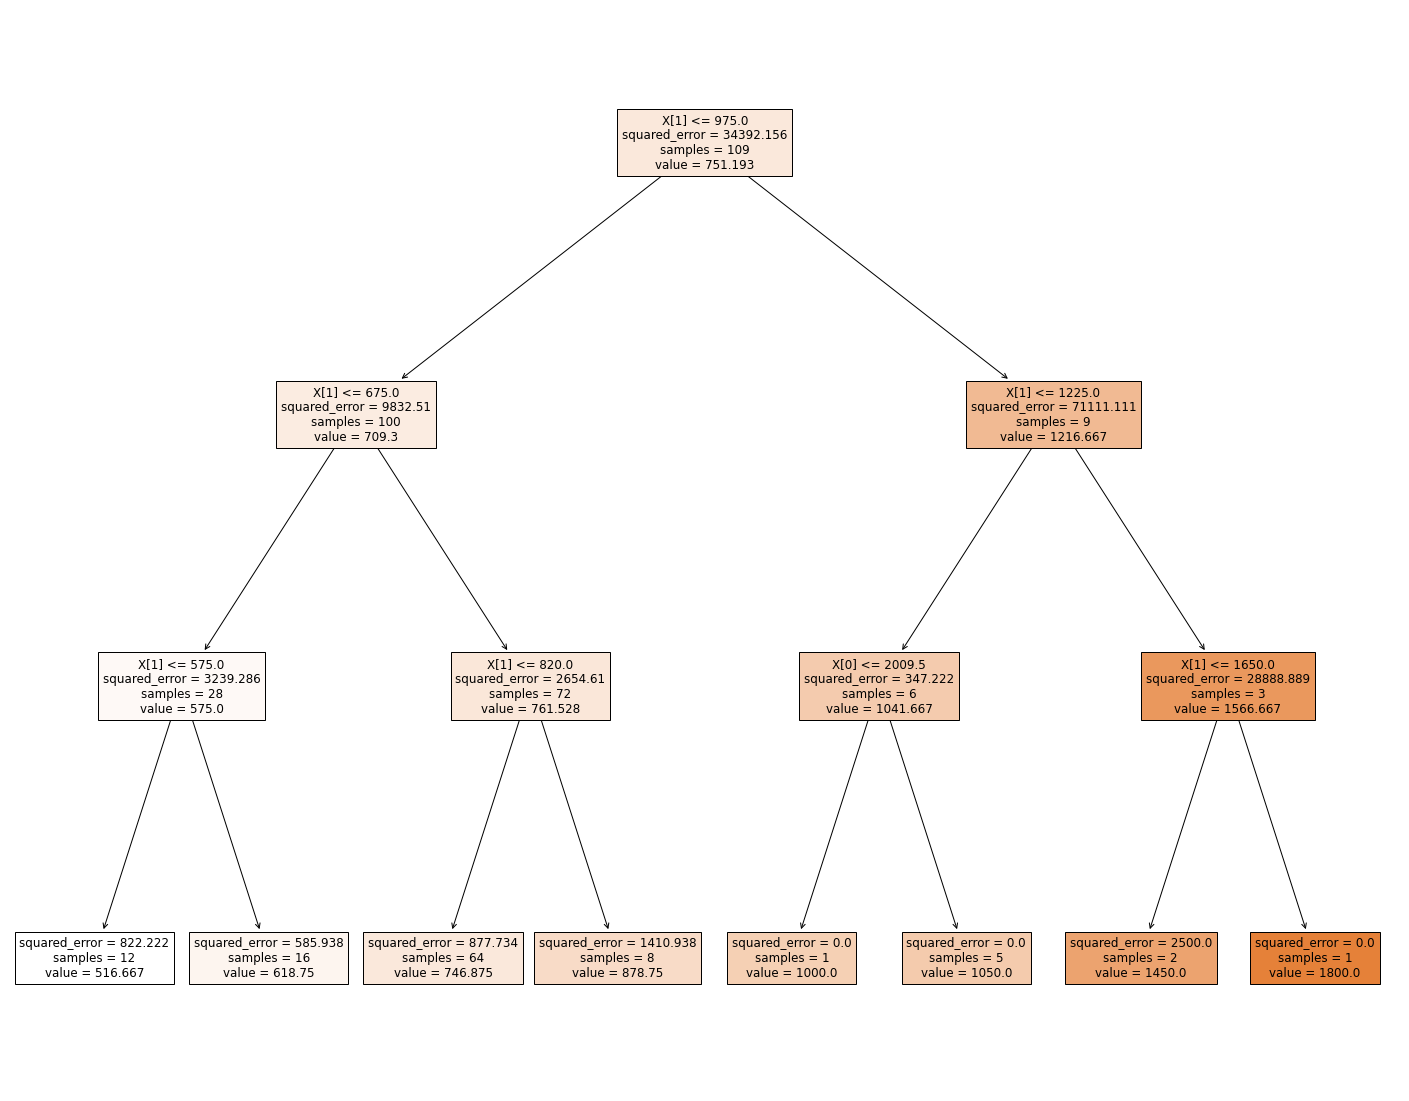

In [296]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(regr, filled=True)

|--- feature_2 <= 2.45
|   |--- class: 0
|--- feature_2 >  2.45
|   |--- feature_3 <= 1.75
|   |   |--- feature_2 <= 4.95
|   |   |   |--- feature_3 <= 1.65
|   |   |   |   |--- class: 1
|   |   |   |--- feature_3 >  1.65
|   |   |   |   |--- class: 2
|   |   |--- feature_2 >  4.95
|   |   |   |--- feature_3 <= 1.55
|   |   |   |   |--- class: 2
|   |   |   |--- feature_3 >  1.55
|   |   |   |   |--- feature_0 <= 6.95
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- feature_0 >  6.95
|   |   |   |   |   |--- class: 2
|   |--- feature_3 >  1.75
|   |   |--- feature_2 <= 4.85
|   |   |   |--- feature_1 <= 3.10
|   |   |   |   |--- class: 2
|   |   |   |--- feature_1 >  3.10
|   |   |   |   |--- class: 1
|   |   |--- feature_2 >  4.85
|   |   |   |--- class: 2



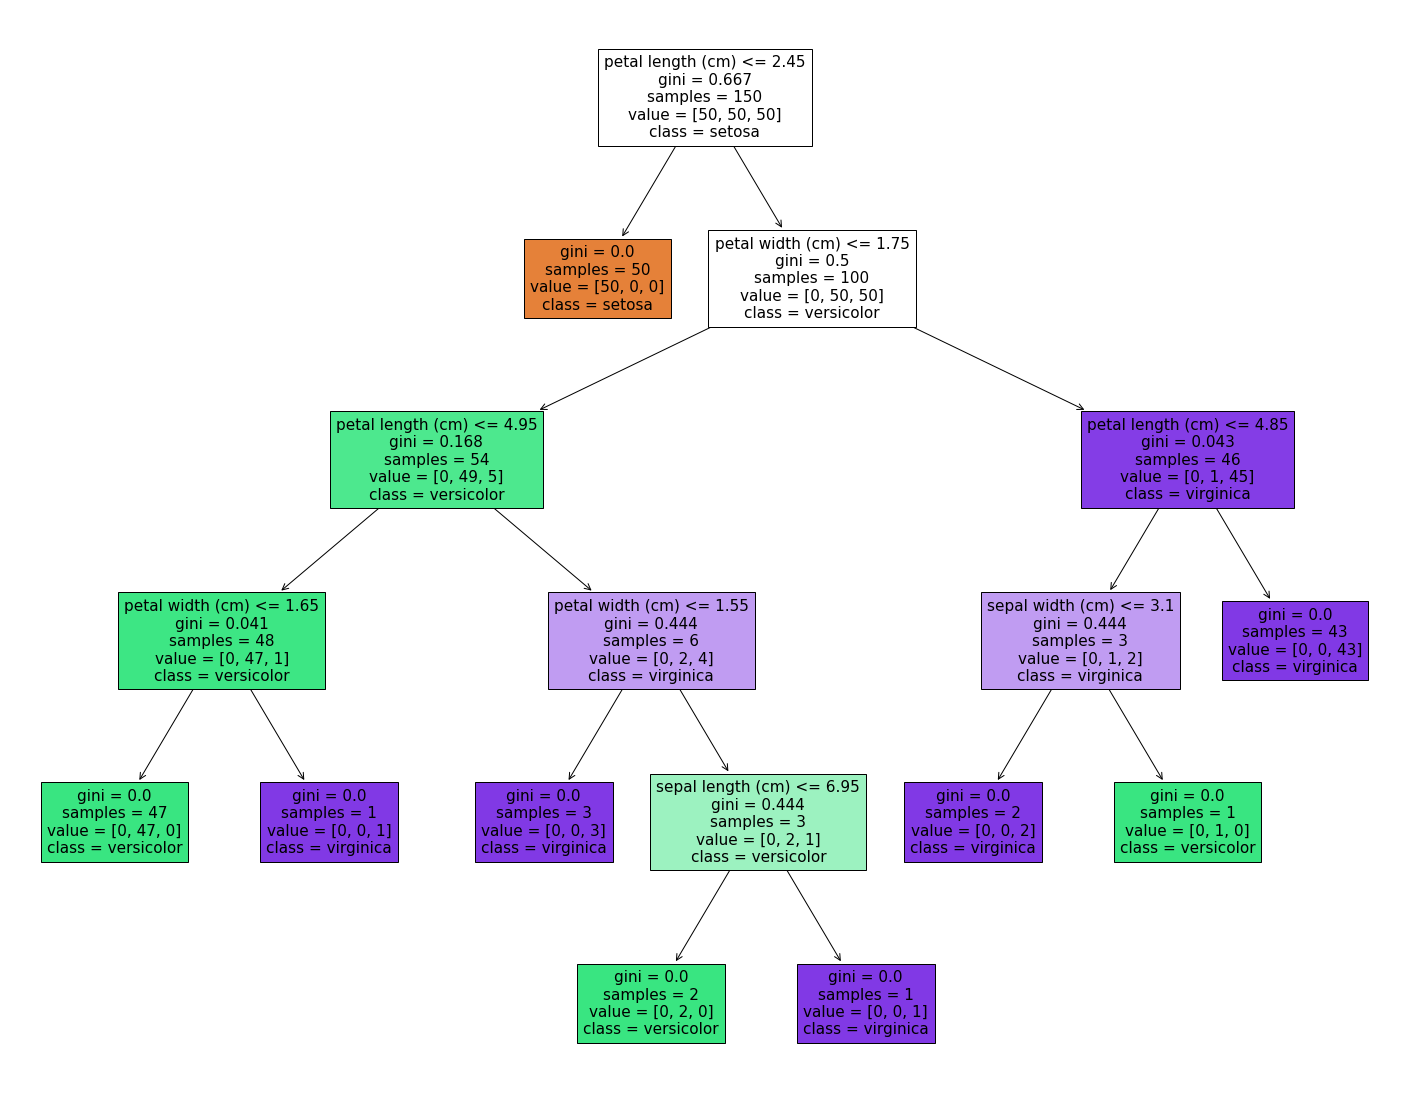

In [297]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn import tree

iris = datasets.load_iris()
X = iris.data
y = iris.target
clf = DecisionTreeClassifier(random_state=1234)
model = clf.fit(X, y)
text_representation = tree.export_text(clf)
print(text_representation)

fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(clf, 
                   feature_names=iris.feature_names,  
                   class_names=iris.target_names,
                   filled=True)



|--- feature_2 <= 2.45
|   |--- value: [0.00]
|--- feature_2 >  2.45
|   |--- feature_3 <= 1.75
|   |   |--- feature_2 <= 4.95
|   |   |   |--- value: [1.02]
|   |   |--- feature_2 >  4.95
|   |   |   |--- value: [1.67]
|   |--- feature_3 >  1.75
|   |   |--- feature_2 <= 4.85
|   |   |   |--- value: [1.67]
|   |   |--- feature_2 >  4.85
|   |   |   |--- value: [2.00]



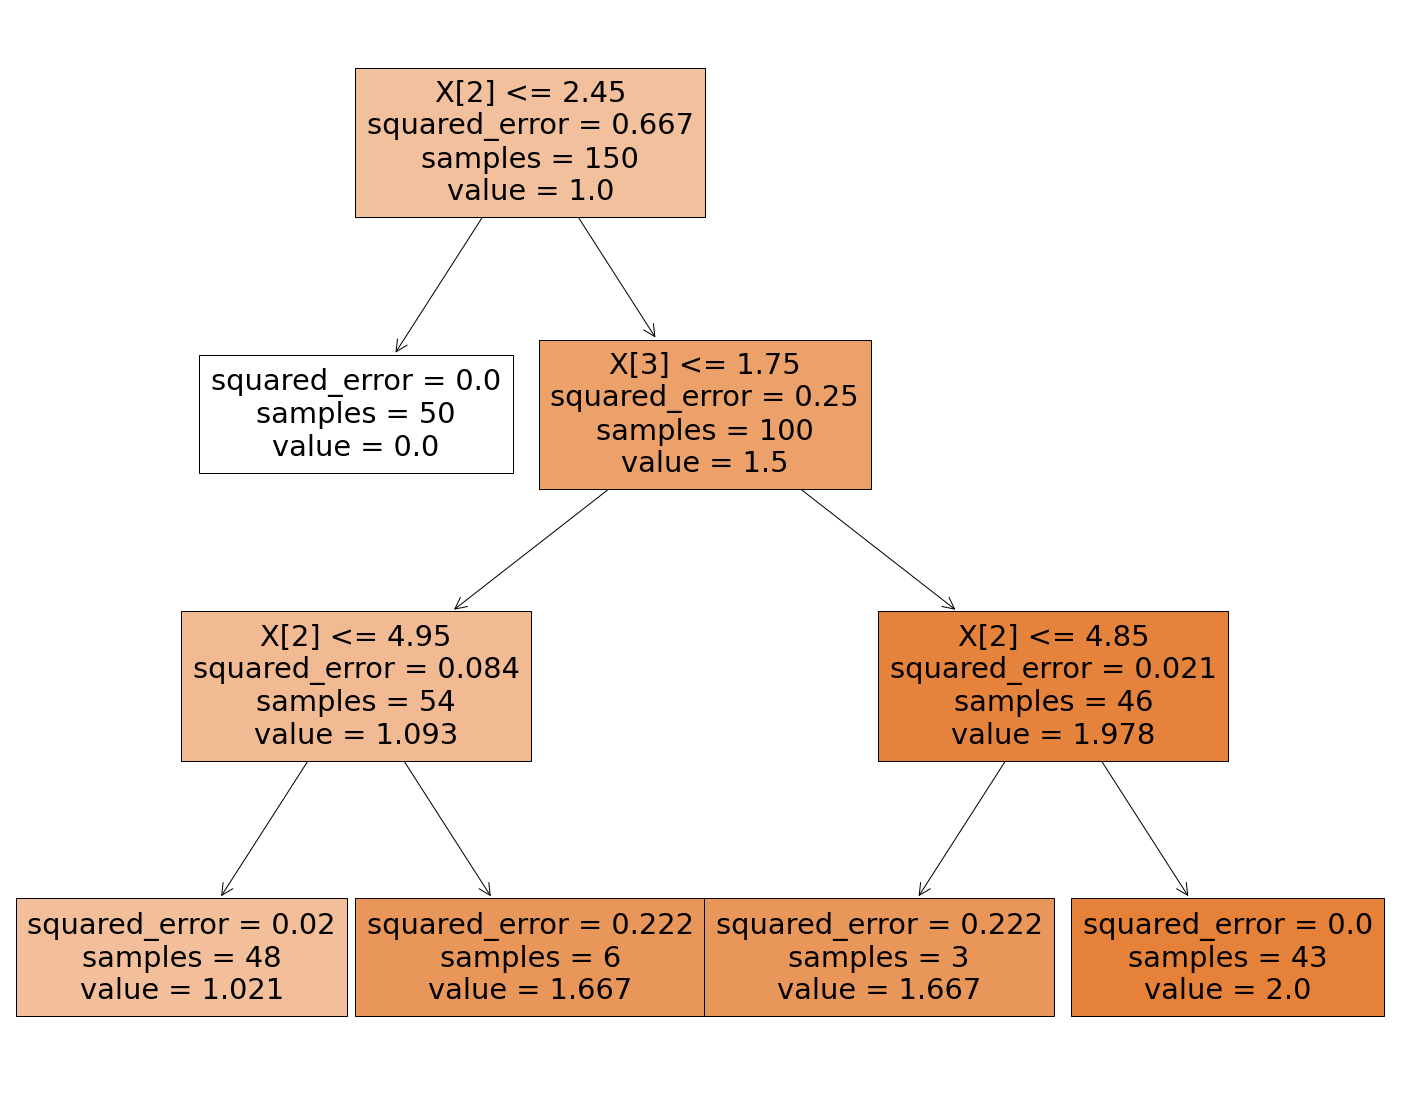

In [298]:
# Fit the regressor, set max_depth = 3
regr = DecisionTreeRegressor(max_depth=3, random_state=1234)
model = regr.fit(X, y)

text_representation = tree.export_text(regr)
print(text_representation)

fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(regr, filled=True)


In [299]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn import datasets


In [300]:
iris = datasets.load_iris()
X = iris.data
y = iris.target
clf = DecisionTreeClassifier(random_state=1234)
model = clf.fit(X, y)
text_representation = tree.export_text(clf)
print(text_representation)

|--- feature_2 <= 2.45
|   |--- class: 0
|--- feature_2 >  2.45
|   |--- feature_3 <= 1.75
|   |   |--- feature_2 <= 4.95
|   |   |   |--- feature_3 <= 1.65
|   |   |   |   |--- class: 1
|   |   |   |--- feature_3 >  1.65
|   |   |   |   |--- class: 2
|   |   |--- feature_2 >  4.95
|   |   |   |--- feature_3 <= 1.55
|   |   |   |   |--- class: 2
|   |   |   |--- feature_3 >  1.55
|   |   |   |   |--- feature_0 <= 6.95
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- feature_0 >  6.95
|   |   |   |   |   |--- class: 2
|   |--- feature_3 >  1.75
|   |   |--- feature_2 <= 4.85
|   |   |   |--- feature_1 <= 3.10
|   |   |   |   |--- class: 2
|   |   |   |--- feature_1 >  3.10
|   |   |   |   |--- class: 1
|   |   |--- feature_2 >  4.85
|   |   |   |--- class: 2



In [301]:
text_representation = tree.export_text(regr)
print(text_representation)

|--- feature_2 <= 2.45
|   |--- value: [0.00]
|--- feature_2 >  2.45
|   |--- feature_3 <= 1.75
|   |   |--- feature_2 <= 4.95
|   |   |   |--- value: [1.02]
|   |   |--- feature_2 >  4.95
|   |   |   |--- value: [1.67]
|   |--- feature_3 >  1.75
|   |   |--- feature_2 <= 4.85
|   |   |   |--- value: [1.67]
|   |   |--- feature_2 >  4.85
|   |   |   |--- value: [2.00]



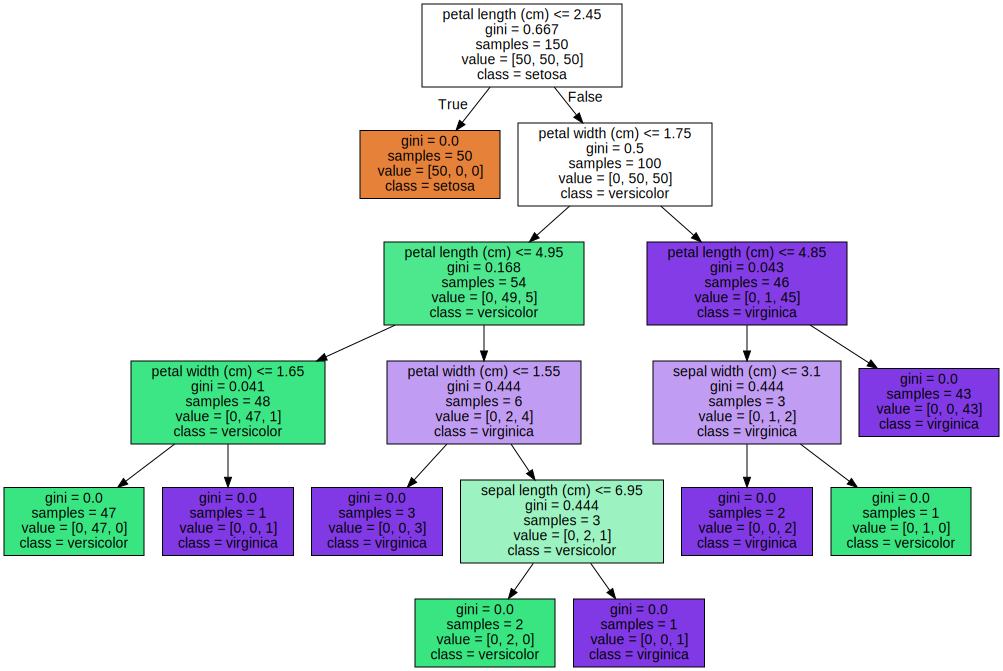

In [302]:
import graphviz
# DOT data
dot_data = tree.export_graphviz(clf, out_file=None, 
                                feature_names=iris.feature_names,  
                                class_names=iris.target_names,
                                filled=True)

# Draw graph
graph = graphviz.Source(dot_data, format="png") 
graph
